<a href="https://colab.research.google.com/github/lucaskrlima/bootcamp_soulcode_da/blob/main/ProjetoAirbnb_SoulCode_LucasLima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto 03 - Case Airbnb**

Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech - AD2

Período: Semana 6 - ETL

Professor: Franciane Rodrigues

Aluno: Lucas Kauê Ramos de Lima

## **Requisitos**

* 1 - Realizar uma análise exploratória de dados com a base de dados do Airbnb;

* 2 - Analisar e identificar os determinantes dos preços do Airbnb;

* 3 - Indicar possíveis oportunidades e/ou ameaças para o empreendimento;



## **Informações gerais da base de dados**

* Esta base de dados fornece uma visão abrangente dos preços do Airbnb em algumas das cidades europeias mais populares. Cada listagem é avaliada quanto a várias características, como tipos de quartos, classificações de limpeza e satisfação, número de quartos, distância do centro da cidade e muito mais, com objetivo de obter uma compreensão detalhada dos preços do Airbnb.

  Fonte: https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities




## **Dicionário de dados**

* realSum: preço total do alojamento para duas pessoas e duas noites em EUR (o preço total é definido a partir de sete taxas: taxa de serviço airbnb, taxa de limpeza, taxa de hóspede adicional, taxa de animais de estimação, depósito de segurança, imposto de valor agregado, impostos locais)
* room_type: tipo de acomodação
* room_shared: acomodação com quartos compartilhados
* room_private: acomodação com quartos privados
* person_capacity: número máximo de convidados
* host_is_superhost: status de super anfitrião (taxa de resposta em 90%)
* multi: anfitrião com 2-4 ofertas para vários hóspedes
* biz: anfitrião com mais de 4 ofertas para vários hóspedes
* clean_rating: classificação de limpeza
* guest_satisfaction_overall: avaliação geral do anúncio
* bedrooms: número de quartos (0 para estúdios)
* dist: distância do centro da cidade em km
* metro_dist: distância da estação de metrô mais próxima em km
* attr_index: índice de atração do local do anúncio (Qualidade x Popularidade x Preço)
* attr_index_norm: índice de atração normalizado (0-100)
* rest_index: índice do restaurante do local da listagem
* attr_index_norm: índice de restaurante normalizado (0-100)
* lng: longitude do local de listagem
* lat: latitude do local da listagem

## **Instalação de pacotes/Bibliotecas**

In [ ]:
!pip install gcsfs # biblioteca para leitura e gravação de arquivos no GCS
!pip install pandera # biblioteca para executar validação de dados em um dataframe(df)

## **Importação de bibliotecas**

In [ ]:
import os                           # Importa a biblioteca "os" para interagir com o sistema operacional
import pandas as pd                 # Importar a biblioteca "pandas" e atribuir um apelido "pd"
import numpy as np                  # numpy para calculos númericos, matrizes multidimensionais, funções matemáticas avançadas
import pandera as pa                # pandera adiciona recursos de validação de dados ao pandas
import matplotlib.pyplot as plt     # matplotlib criação e visualização de dados

from google.cloud import storage    # funcionalidades para interagir com o serviço de armazenamento em nuvem do Google Cloud Platform (GCP)

In [ ]:
import warnings # Ignorar avisos
warnings.filterwarnings("ignore")

## **Extração**

In [ ]:
# acesso ao gcp
# CONFIGURANDO DA CHAVE DE SEGURANCA - ACESSO O PROJETO
serviceAccount = '/content/projeto-do-lucas-kaue-db3af9d1d580.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Configurações Google Cloud Storage - ACESSO AO BUCKET
client = storage.Client()
bucket = client.get_bucket('projeto_gcp')
bucket.blob('airbnb.csv')
path = 'gs://projeto_gcp/Projetos/Datasets/Airbnb/Bruto/airbnb.csv'

In [ ]:
# Lendo o arquivo base e definindo o dataframe
df = pd.read_csv(path)

In [ ]:
# Backup de segurança
dfback1 = df.copy()

## **Pré-Análise**

In [ ]:
#Identificando o tamanho do dataset
# Total de amostra de 1103 registros
df.shape

(1103, 20)

In [ ]:
# Imprime informações sobre o DataFrame: índice dtype, colunas, valores não nulos e uso de memória.
# Este Dataframe possui em sua maioria colunas numéricas
# Natureza dos dados quantitativos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   float64
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

In [ ]:
# Analisando o dataframe de forma geral
# Visualiza as 5 primeiras e as 5 últimas linhas
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [ ]:
# Visualizando as 5 primeiras linhas do dataframe.
# Útil para verificar de forma rápida se o df possui o tipo certo de dados.
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [ ]:
# Visualizando as ultimas n linhas do dataframe.
# Útil para verificar dados rapidamente, por exemplo, após classificar ou anexar linhas.
df.tail()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794
1102,1102,258.008577,Shared room,True,False,2.0,False,0,0,8.0,90.0,1,0.280204,0.516217,533.962653,28.273677,807.492307,56.267226,4.89295,52.37575


In [ ]:
#Calculando o tamanho ideal para uma amostragem quantitativa simples
def tamanhoAmostra(e,N):
  n = (N / (1 + (N*(e**2))))

  return (n)

ee = 0.05
Nn = 1103

print(tamanhoAmostra(ee, Nn))

293.54624085163


### Equação do cálculo de amostragem

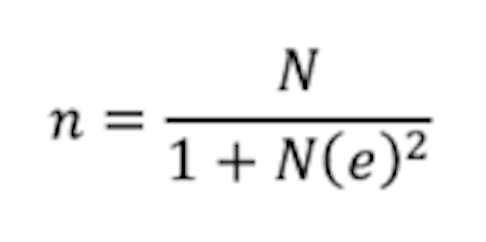

* N = tamanho da amostragem
* e = margem de erro
* Para este projeto a margem de erro utilizada é de 0.05(5%)
* O nível de confiança considerado é de 95%

In [ ]:
# Amostragem aleatória simples sem reposição
df.sample(293)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
953,953,1005.085183,Entire home/apt,False,False,4.0,False,0,0,9.0,97.0,3,1.574794,1.200842,370.021782,19.592899,469.588829,32.721625,4.87465,52.36470
969,969,651.231458,Entire home/apt,False,False,4.0,False,0,0,9.0,97.0,2,2.332380,1.478693,183.694881,9.726766,228.274440,15.906491,4.85941,52.37702
221,221,648.888056,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,1.591039,1.513888,298.029572,15.780864,394.622397,27.497856,4.87085,52.36887
718,718,251.915731,Private room,False,True,2.0,False,0,1,8.0,85.0,1,2.527532,0.339717,268.848216,14.235692,353.789620,24.652570,4.89075,52.35056
972,972,390.879479,Entire home/apt,False,False,2.0,False,0,0,10.0,91.0,0,2.526830,1.358644,303.723955,16.082385,318.992470,22.227854,4.87076,52.35510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,715,344.245776,Private room,False,True,2.0,False,0,0,10.0,80.0,1,2.251374,1.727599,208.227051,11.025761,260.257028,18.135084,4.86039,52.37029
841,841,298.783774,Private room,False,True,2.0,True,0,0,8.0,89.0,1,3.557425,0.997353,167.169715,8.851748,198.461151,13.829059,4.86326,52.34699
965,965,393.457221,Private room,False,True,2.0,False,1,0,9.0,93.0,1,3.798578,2.402027,114.957509,6.087076,146.021108,10.174961,4.94530,52.36120
554,554,337.918590,Private room,False,True,2.0,True,1,0,10.0,96.0,1,6.641469,2.123983,71.548848,3.788559,88.555763,6.170693,4.80367,52.34944


##**Transformação**

**Verificações gerais e básicas do dataframe. Pontos de atenção:**

*  Definir colunas importantes para a análise;
*  Tradução/Renomeação de valores e cabeçalhos
*  Verificar e tratar valores nulos;
*  Verificar valores unicos das colunas
*  Verificar e tratar valores duplicados;
*  Verificar e tratar inconsistências;
*  Transformação de tipos adequados dos dados


Colunas definidas para análise:

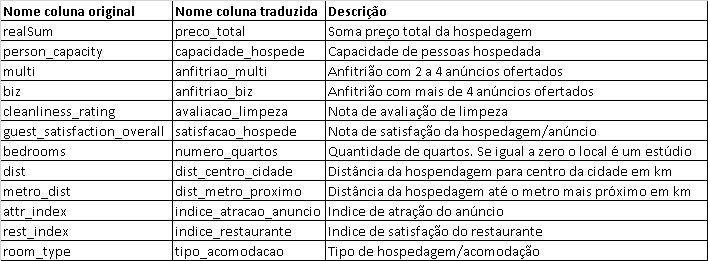

In [ ]:
# Tradução e renomeaçaõ das colunas
df.rename(columns={'realSum':'preco_total','room_type':'tipo_acomodacao','person_capacity':'capacidade_hospede','multi':'anfitriao_multi','biz':'anfitriao_biz','cleanliness_rating':'avaliacao_limpeza','guest_satisfaction_overall':'satisfacao_hospede','bedrooms':'numero_quartos','dist':'dist_centro_cidade','metro_dist':'dist_metro_proximo','attr_index':'indice_atracao_anuncio','rest_index':'indice_restaurante'}, inplace = True)

In [ ]:
# Excluindo colunas não utilizadas
df.drop({'room_shared','room_private','host_is_superhost','attr_index_norm','rest_index_norm','lng','lat'}, axis=1, inplace=True)

In [ ]:
#Traduzindo valores da coluna tipo_acomodacao
traducao_tipo_acomodacao = {
     'Entire home/apt': 'Casa inteira/Apt',
    'Shared room': 'Quarto compartilhado',
    'Private room':'Quarto privado'
}

In [ ]:
df['tipo_acomodacao'].replace(traducao_tipo_acomodacao,inplace=True)

In [ ]:
# Exibindo cabeçalho dos dados tratados
df.head()

,Unnamed: 0,preco_total,tipo_acomodacao,capacidade_hospede,anfitriao_multi,anfitriao_biz,avaliacao_limpeza,satisfacao_hospede,numero_quartos,dist_centro_cidade,dist_metro_proximo,indice_atracao_anuncio,indice_restaurante
0,0,194.033698,Quarto privado,2.0,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,98.253896
1,1,344.245776,Quarto privado,4.0,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,837.280757
2,2,264.101422,Quarto privado,2.0,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,95.386955
3,3,433.529398,Quarto privado,4.0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,875.033098
4,4,485.552926,Quarto privado,2.0,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,815.305740


In [ ]:
# Verificando tipo dos dados do dataset
df.dtypes

Unnamed: 0                  int64
preco_total               float64
tipo_acomodacao            object
capacidade_hospede        float64
anfitriao_multi             int64
anfitriao_biz               int64
avaliacao_limpeza         float64
satisfacao_hospede        float64
numero_quartos              int64
dist_centro_cidade        float64
dist_metro_proximo        float64
indice_atracao_anuncio    float64
indice_restaurante        float64
dtype: object

In [ ]:
# Convertendo capacidade_hospede de float para int
df['capacidade_hospede'] = df['capacidade_hospede'].astype(int)

In [ ]:
# Convertendo tipo_acomodacao de object para string
df['tipo_acomodacao'] = df['tipo_acomodacao'].astype(str)

In [ ]:
# Convertendo avaliacao_limpeza de object para string
df['avaliacao_limpeza'] = df['avaliacao_limpeza'].astype(int)

In [ ]:
# Convertendo satisfacao_hospede de object para string
df['satisfacao_hospede'] = df['satisfacao_hospede'].astype(int)

In [ ]:
# Convertendo indice_atracao_anuncio de object para string
df['indice_atracao_anuncio'] = df['indice_atracao_anuncio'].astype(int)

In [ ]:
df['indice_restaurante'] = df['indice_restaurante'].astype(int)

In [ ]:
#Verificando tipo de dados
df.dtypes

Unnamed: 0                  int64
preco_total               float64
tipo_acomodacao            object
capacidade_hospede          int64
anfitriao_multi             int64
anfitriao_biz               int64
avaliacao_limpeza           int64
satisfacao_hospede          int64
numero_quartos              int64
dist_centro_cidade        float64
dist_metro_proximo        float64
indice_atracao_anuncio      int64
indice_restaurante          int64
dtype: object

In [ ]:
# Verificando e contando valores NaN no dataframe
df.isna().sum()

Unnamed: 0                0
preco_total               0
tipo_acomodacao           0
capacidade_hospede        0
anfitriao_multi           0
anfitriao_biz             0
avaliacao_limpeza         0
satisfacao_hospede        0
numero_quartos            0
dist_centro_cidade        0
dist_metro_proximo        0
indice_atracao_anuncio    0
indice_restaurante        0
dtype: int64

In [ ]:
# Verificação de valores unicos na coluna
print(pd.unique(df['avaliacao_limpeza']))

[10  8  9  6  7  5  4]


In [ ]:
#Verificação de dados inconsistentes de preco_total
print(sorted(pd.unique(df['preco_total'])))

[128.88711831837463, 143.65055187120663, 144.82225294682823, 161.9290886509034, 165.67853209289248, 167.3189135987627, 175.75516134323811, 177.16120263398403, 178.0985634944813, 180.20762543060016, 181.8480069364704, 184.4257493028379, 188.17519274482692, 191.6902959716917, 192.8619970473133, 194.03369812293488, 196.6114404893024, 198.9548426405456, 199.89220350104284, 201.53258500691305, 202.70428608253465, 204.1103273732805, 205.2820284489021, 206.4537295245237, 208.7971316757669, 209.03147189089125, 210.2031729665128, 213.95261640850188, 215.12431748412348, 217.70205985049097, 218.63942071098825, 218.8737609261125, 221.2171630773557, 221.45150329248003, 225.66962716471772, 227.310008670588, 228.71604996133388, 230.82511189745276, 232.23115318819865, 233.63719447894456, 234.57455533944184, 237.85531835118223, 238.3239987814309, 239.4956998570525, 239.7300400721768, 241.1360813629227, 241.83910200829567, 242.07344222342, 243.2451432990416, 244.4168443746632, 245.5885454502848, 245.822

In [ ]:
#Verificação de dados inconsistentes de tipo_acomodacao
print(sorted(pd.unique(df['tipo_acomodacao'])))

['Casa inteira/Apt', 'Quarto compartilhado', 'Quarto privado']


In [ ]:
#Verificação de dados inconsistentes capacidade_hospede
print(sorted(pd.unique(df['capacidade_hospede'])))

[2, 3, 4, 5, 6]


In [ ]:
#Verificação de dados inconsistentes anfitriao_multi
print(sorted(pd.unique(df['anfitriao_multi'])))

[0, 1]


In [ ]:
#Verificação de dados inconsistentes de anfitriao_biz
print(sorted(pd.unique(df['anfitriao_biz'])))

[0, 1]


In [ ]:
#Verificação de dados inconsistentes de avaliacao_limpeza
print(sorted(pd.unique(df['avaliacao_limpeza'])))

[4, 5, 6, 7, 8, 9, 10]


In [ ]:
#Verificação de dados inconsistentes de satisfacao_hospede
print(sorted(pd.unique(df['satisfacao_hospede'])))

[20, 47, 60, 65, 70, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [ ]:
#Verificação de dados inconsistentes de numero_quartos
print(sorted(pd.unique(df['numero_quartos'])))

[0, 1, 2, 3, 4, 5]


In [ ]:
#Verificação de dados inconsistentes de dist_centro_cidade
print(sorted(pd.unique(df['dist_centro_cidade'])))

[0.0150587980705548, 0.099653501265351, 0.11480567677719, 0.1228203248413586, 0.1386645584328363, 0.1613319628315826, 0.1673131477644722, 0.1757999097494184, 0.1847578358707701, 0.1885288278893922, 0.1951980501873343, 0.218366101609283, 0.2224653424234426, 0.2272606763176075, 0.2403669761183767, 0.2613177343616277, 0.2645439121022677, 0.2726701727182661, 0.2746367615057592, 0.2754348902526141, 0.2802043670336476, 0.2802081671693026, 0.2804455866459713, 0.2862270363942465, 0.2872028149662998, 0.2877071439287178, 0.2895266515672745, 0.290728499113068, 0.2963133809226728, 0.2974726347767152, 0.2988822359077754, 0.3345436175529303, 0.3362210405432312, 0.3379457651761013, 0.3396755797229193, 0.3428061638767657, 0.345523840742521, 0.3530819578031284, 0.3537205344170818, 0.3605068051816017, 0.3633454412498557, 0.3639339290695795, 0.3700082752668438, 0.3714395451909041, 0.3720313749795971, 0.3751350635549438, 0.3846115997106273, 0.384862012821602, 0.3940358562606905, 0.3971287274991505, 0.3983

In [ ]:
#Verificação de dados inconsistentes de dist_metro_proximo
print(sorted(pd.unique(df['dist_metro_proximo'])))

[0.0365299349690898, 0.0383546937010648, 0.0452202367146166, 0.0484628244968149, 0.0510521030736588, 0.0549307888656383, 0.0567934111340297, 0.0568915518360108, 0.0576981436516522, 0.0687184318413499, 0.0708805340183559, 0.0752365553720472, 0.0779166156732898, 0.0837770875750669, 0.1007740057793931, 0.1012318191726814, 0.1051871237368232, 0.1068345836161703, 0.1073010915114232, 0.1089403915386729, 0.1112526778129059, 0.1129651468266271, 0.119528106734041, 0.1210290090382624, 0.1220813873662373, 0.1245077819423133, 0.1256081740720538, 0.1266261912071032, 0.1269511243741907, 0.1304376878811783, 0.134728523844149, 0.1432629485982863, 0.1459595422340796, 0.147342513212529, 0.1504065294975317, 0.1530381646078639, 0.1534425610558035, 0.1548958309412227, 0.1572362826184581, 0.1581548155442651, 0.1659570897955379, 0.1661690453846391, 0.1673273754409381, 0.1733919684462981, 0.175794704274626, 0.176270148154478, 0.178057071188013, 0.1807682543430058, 0.1816822906160285, 0.1831750782063814, 0.186

In [ ]:
#Verificação de dados inconsistentes indice_atracao_anuncio
print(sorted(pd.unique(df['indice_atracao_anuncio'])))

[40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 204, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 230, 231, 232, 233, 236, 238, 239, 240, 241, 242, 245, 246, 247, 249, 250, 251, 252, 253, 254, 256, 257, 258, 259, 260, 261, 263, 265, 266, 267, 268, 269, 2

In [ ]:
#Verificação de dados inconsistentes de indice_restaurante
print(sorted(pd.unique(df['indice_restaurante'])))

[50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 108, 109, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 203, 204, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 248, 249, 250, 251, 252, 253, 254, 255, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 271, 272, 273, 274, 276, 277, 278, 279, 281, 

In [ ]:
#Exibindo cabeçalho
df.head()

,Unnamed: 0,preco_total,tipo_acomodacao,capacidade_hospede,anfitriao_multi,anfitriao_biz,avaliacao_limpeza,satisfacao_hospede,numero_quartos,dist_centro_cidade,dist_metro_proximo,indice_atracao_anuncio,indice_restaurante
0,0,194.033698,Quarto privado,2,1,0,10,93,1,5.022964,2.539380,78,98
1,1,344.245776,Quarto privado,4,0,0,8,85,1,0.488389,0.239404,631,837
2,2,264.101422,Quarto privado,2,0,1,9,87,1,5.748312,3.651621,75,95
3,3,433.529398,Quarto privado,4,0,1,9,90,2,0.384862,0.439876,493,875
4,4,485.552926,Quarto privado,2,0,0,10,98,1,0.544738,0.318693,552,815


In [ ]:
# Formatando as casas decimais do dataframe
pd.set_option('display.precision', 3)

In [ ]:
# Verificando registros iniciais do dataframe tratado
df.head()

,Unnamed: 0,preco_total,tipo_acomodacao,capacidade_hospede,anfitriao_multi,anfitriao_biz,avaliacao_limpeza,satisfacao_hospede,numero_quartos,dist_centro_cidade,dist_metro_proximo,indice_atracao_anuncio,indice_restaurante
0,0,194.034,Quarto privado,2,1,0,10,93,1,5.023,2.539,78,98
1,1,344.246,Quarto privado,4,0,0,8,85,1,0.488,0.239,631,837
2,2,264.101,Quarto privado,2,0,1,9,87,1,5.748,3.652,75,95
3,3,433.529,Quarto privado,4,0,1,9,90,2,0.385,0.440,493,875
4,4,485.553,Quarto privado,2,0,0,10,98,1,0.545,0.319,552,815


In [ ]:
# Verificando registros finais do dataframe tratado
df.tail()

,Unnamed: 0,preco_total,tipo_acomodacao,capacidade_hospede,anfitriao_multi,anfitriao_biz,avaliacao_limpeza,satisfacao_hospede,numero_quartos,dist_centro_cidade,dist_metro_proximo,indice_atracao_anuncio,indice_restaurante
1098,1098,2486.115,Casa inteira/Apt,2,0,0,10,100,1,2.376,1.436,181,225
1099,1099,233.637,Quarto privado,2,1,0,10,90,1,4.720,0.322,108,134
1100,1100,317.062,Quarto privado,2,1,0,10,92,1,0.598,0.752,440,625
1101,1101,1812.856,Casa inteira/Apt,4,0,0,8,84,5,1.943,0.389,257,336
1102,1102,258.009,Quarto compartilhado,2,0,0,8,90,1,0.280,0.516,533,807


In [ ]:
#Definido um novo dataframe com amostra da polução
dft = df.sample(293)


In [ ]:
#Criando um novo dataframe com um novo indice
dfti = dft.reset_index()
del dfti['index'] #deleta coluna index duplicada
dfti              # dfti = Dataframe tratado novo index

,Unnamed: 0,preco_total,tipo_acomodacao,capacidade_hospede,anfitriao_multi,anfitriao_biz,avaliacao_limpeza,satisfacao_hospede,numero_quartos,dist_centro_cidade,dist_metro_proximo,indice_atracao_anuncio,indice_restaurante
0,810,921.660,Casa inteira/Apt,4,1,0,10,100,2,1.309,0.342,481,508
1,263,436.341,Quarto privado,2,0,1,9,90,0,1.092,0.562,484,843
2,424,392.051,Casa inteira/Apt,2,0,0,9,90,1,2.709,1.241,170,215
3,1014,209.031,Quarto compartilhado,2,0,0,9,94,1,1.994,1.801,192,253
4,632,144.822,Quarto privado,2,0,1,9,85,1,7.548,3.271,61,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,924,409.392,Casa inteira/Apt,4,1,0,10,93,2,2.567,1.889,162,201
289,370,259.415,Quarto privado,3,1,0,9,92,1,2.679,0.620,199,254
290,290,489.302,Casa inteira/Apt,2,1,0,8,85,1,0.531,0.147,538,637
291,948,282.849,Quarto privado,4,0,0,9,94,2,3.242,2.477,128,161


In [ ]:
# Comparando média geral de preco_total da base bruta com a base tratada para verificar acurácia
# preco_total é variável principal da análise
media_sal_df_bruto = df['preco_total'].mean()
media_preco_total_dft = dfti['preco_total'].mean()
print(f'Média preço_total df bruto: {media_sal_df_bruto:.2f}')
print(f'Média preço_total df tratado: {media_preco_total_dft:.2f}')

Média preço_total df bruto: 545.02
Média preço_total df tratado: 520.77


##**Garantia e integridade dos dados**

In [ ]:
# Exibindo tipo dados base tratada
dfti.dtypes

Unnamed: 0                  int64
preco_total               float64
tipo_acomodacao            object
capacidade_hospede          int64
anfitriao_multi             int64
anfitriao_biz               int64
avaliacao_limpeza           int64
satisfacao_hospede          int64
numero_quartos              int64
dist_centro_cidade        float64
dist_metro_proximo        float64
indice_atracao_anuncio      int64
indice_restaurante          int64
dtype: object

In [ ]:
# Validação de schema
schema = pa.DataFrameSchema({'preco_total': pa.Column(pa.Float),
                            'tipo_acomodacao': pa.Column(pa.String),
                            'capacidade_hospede': pa.Column(pa.Int),
                            'anfitriao_multi': pa.Column(pa.Int),
                            'anfitriao_biz': pa.Column(pa.Int),
                            'avaliacao_limpeza': pa.Column(pa.Int),
                            'satisfacao_hospede': pa.Column(pa.Int),
                            'numero_quartos': pa.Column(pa.Int),
                            'dist_centro_cidade': pa.Column(pa.Float),
                            'dist_metro_proximo': pa.Column(pa.Float),
                            'indice_atracao_anuncio': pa.Column(pa.Int),
                            'indice_restaurante': pa.Column(pa.Int)
                            })
# Validação do DataFrame
schema.validate(dfti)

,Unnamed: 0,preco_total,tipo_acomodacao,capacidade_hospede,anfitriao_multi,anfitriao_biz,avaliacao_limpeza,satisfacao_hospede,numero_quartos,dist_centro_cidade,dist_metro_proximo,indice_atracao_anuncio,indice_restaurante
0,810,921.660,Casa inteira/Apt,4,1,0,10,100,2,1.309,0.342,481,508
1,263,436.341,Quarto privado,2,0,1,9,90,0,1.092,0.562,484,843
2,424,392.051,Casa inteira/Apt,2,0,0,9,90,1,2.709,1.241,170,215
3,1014,209.031,Quarto compartilhado,2,0,0,9,94,1,1.994,1.801,192,253
4,632,144.822,Quarto privado,2,0,1,9,85,1,7.548,3.271,61,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,924,409.392,Casa inteira/Apt,4,1,0,10,93,2,2.567,1.889,162,201
289,370,259.415,Quarto privado,3,1,0,9,92,1,2.679,0.620,199,254
290,290,489.302,Casa inteira/Apt,2,1,0,8,85,1,0.531,0.147,538,637
291,948,282.849,Quarto privado,4,0,0,9,94,2,3.242,2.477,128,161


In [ ]:
# Backup local do dataframe tratado
dfback2 = dfti.copy()

##**Carregamento**

In [ ]:
# Exportação da base tratada para o GCP
dfti.to_csv('gs://projeto_gcp/Projetos/Datasets/Airbnb/Tratado/airbnb_tratado.csv', index=False)

##**Análises**

###***Análise numérica***

In [ ]:
#Vericando se há idice repetidos igual a 0
dfti.loc[0]

Unnamed: 0                             810
preco_total                         921.66
tipo_acomodacao           Casa inteira/Apt
capacidade_hospede                       4
anfitriao_multi                          1
anfitriao_biz                            0
avaliacao_limpeza                       10
satisfacao_hospede                     100
numero_quartos                           2
dist_centro_cidade                   1.309
dist_metro_proximo                   0.342
indice_atracao_anuncio                 481
indice_restaurante                     508
Name: 0, dtype: object

In [ ]:
#Localizando hospedagens com nota máxima de satisfação 100
dfti.loc[dfti['satisfacao_hospede']==100]

,Unnamed: 0,preco_total,tipo_acomodacao,capacidade_hospede,anfitriao_multi,anfitriao_biz,avaliacao_limpeza,satisfacao_hospede,numero_quartos,dist_centro_cidade,dist_metro_proximo,indice_atracao_anuncio,indice_restaurante
0,810,921.660,Casa inteira/Apt,4,1,0,10,100,2,1.309,0.342,481,508
11,784,331.826,Quarto privado,2,1,0,10,100,1,2.344,0.048,213,279
12,673,504.066,Casa inteira/Apt,2,0,0,10,100,0,1.724,1.823,230,284
16,877,539.217,Quarto privado,3,1,0,10,100,1,4.844,0.582,99,124
17,418,1179.669,Casa inteira/Apt,4,1,0,10,100,2,0.666,0.592,518,675
19,411,409.392,Quarto privado,2,1,0,9,100,1,1.472,1.239,358,467
23,490,337.684,Casa inteira/Apt,2,0,0,10,100,1,2.623,1.343,158,199
27,838,764.418,Casa inteira/Apt,4,1,0,10,100,2,3.880,1.013,140,186
32,774,354.322,Quarto privado,2,0,1,10,100,1,1.429,0.717,296,314
42,724,645.373,Quarto privado,2,0,1,10,100,1,0.287,0.497,541,755


In [ ]:
#Filtrando e localizando dados de maior satisfação (acima de 70) com dados de menor preço ( menor que 200)
ft_maior_satisfacao = (dfti.satisfacao_hospede >= 80)
ft_menor_preco = (dfti.preco_total < 200)
dfti.loc[ft_maior_satisfacao & ft_menor_preco]

,Unnamed: 0,preco_total,tipo_acomodacao,capacidade_hospede,anfitriao_multi,anfitriao_biz,avaliacao_limpeza,satisfacao_hospede,numero_quartos,dist_centro_cidade,dist_metro_proximo,indice_atracao_anuncio,indice_restaurante
4,632,144.822,Quarto privado,2,0,1,9,85,1,7.548,3.271,61,75
15,387,194.034,Quarto privado,2,0,0,10,96,1,11.038,0.617,41,51
31,925,196.611,Quarto privado,2,0,0,10,96,1,4.830,2.747,81,102
81,188,196.611,Quarto privado,2,1,0,8,87,1,10.453,0.332,43,54
97,409,191.690,Quarto privado,2,1,0,9,94,1,6.649,0.441,71,89
127,49,196.611,Quarto privado,4,0,0,9,94,1,6.198,2.371,65,81
146,835,161.929,Quarto privado,2,0,0,9,84,1,7.146,2.760,65,81
212,656,196.611,Casa inteira/Apt,2,0,0,10,94,1,5.732,0.875,85,106
222,350,178.099,Quarto privado,2,0,0,10,96,1,8.894,0.449,51,64
268,1046,188.175,Quarto privado,2,1,0,8,83,1,3.119,0.483,165,213


In [ ]:
#Filtrando e localizando os menores indice de satisfação
ft_menor_satisfacao = (dfti.satisfacao_hospede <= 50)
dfti.loc[ft_menor_satisfacao]

,Unnamed: 0,preco_total,tipo_acomodacao,capacidade_hospede,anfitriao_multi,anfitriao_biz,avaliacao_limpeza,satisfacao_hospede,numero_quartos,dist_centro_cidade,dist_metro_proximo,indice_atracao_anuncio,indice_restaurante
147,901,233.637,Quarto privado,2,0,0,6,20,1,8.145,0.688,57,74


In [ ]:
#Media do preço total
media_preco_total = dfti['preco_total'].mean()
print(f'Média do preço total: EUR {media_preco_total:.2f}')

Média do preço total: EUR 520.77


In [ ]:
# Média satisfação de hospedagem
media_satisfacao_hospede = dfti['satisfacao_hospede'].mean()
print(f'Média nível de satisfação do hospede: {media_satisfacao_hospede:.2f}')

Média nível de satisfação do hospede: 94.17


In [ ]:
#Avaliando custo e satisfação
#Filtrando e localizando dados com preço total menor que 520 e satisfação do hospede maior que 94
ft_media_satisfacao = (dfti.satisfacao_hospede >= 94)
ft_media_preco = (dfti.preco_total <= 520)
dfti.loc[ft_media_satisfacao & ft_media_preco]


,Unnamed: 0,preco_total,tipo_acomodacao,capacidade_hospede,anfitriao_multi,anfitriao_biz,avaliacao_limpeza,satisfacao_hospede,numero_quartos,dist_centro_cidade,dist_metro_proximo,indice_atracao_anuncio,indice_restaurante
3,1014,209.031,Quarto compartilhado,2,0,0,9,94,1,1.994,1.801,192,253
5,316,362.524,Casa inteira/Apt,2,0,0,10,97,2,2.465,0.121,202,276
6,992,332.060,Quarto privado,2,1,0,10,99,1,3.658,0.463,162,191
7,228,448.527,Quarto privado,2,0,0,9,95,1,1.224,0.938,267,359
11,784,331.826,Quarto privado,2,1,0,10,100,1,2.344,0.048,213,279
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,633,501.488,Casa inteira/Apt,2,0,0,9,95,1,1.306,1.283,331,455
283,740,288.707,Quarto privado,4,0,0,10,97,1,5.189,3.831,81,101
286,748,421.344,Casa inteira/Apt,2,0,0,10,100,1,3.300,2.160,130,174
291,948,282.849,Quarto privado,4,0,0,9,94,2,3.242,2.477,128,161


In [ ]:
# Contagem de votos de nível de satisfação
# Aqui podemos notar que o nivel de satisfação é alto, acima de 80 indicando uma boa qualidade das hospedagens.
dfti.groupby(['satisfacao_hospede']).size()

satisfacao_hospede
20      1
60      1
77      1
78      1
80     10
82      1
83      2
84      3
85      3
86      4
87      6
88     12
89      4
90     10
91      9
92     13
93     18
94     19
95     10
96     36
97     22
98     35
99     20
100    52
dtype: int64

In [ ]:
# Avaliando o tipo de acomodação com maior numero de satisfação de hospede
# Quarto privado possui a maior soma em pontuação de satisfação de hospede, podemos deduzir que o custo é um determinante.
dfti.groupby('tipo_acomodacao')['satisfacao_hospede'].sum().sort_values(ascending=False)

tipo_acomodacao
Quarto privado          14873
Casa inteira/Apt        12432
Quarto compartilhado      288
Name: satisfacao_hospede, dtype: int64

In [ ]:
#Resumo estatístico da base tratada
dfti.describe()

,Unnamed: 0,preco_total,capacidade_hospede,anfitriao_multi,anfitriao_biz,avaliacao_limpeza,satisfacao_hospede,numero_quartos,dist_centro_cidade,dist_metro_proximo,indice_atracao_anuncio,indice_restaurante
count,293.000,293.000,293.000,293.000,293.000,293.000,293.000,293.000,293.000,293.000,293.000,293.000
mean,535.369,520.773,2.717,0.328,0.102,9.444,94.174,1.239,2.991,1.076,259.287,332.819
std,311.301,368.314,1.003,0.470,0.304,0.884,7.103,0.725,2.225,0.885,180.414,245.712
min,5.000,144.822,2.000,0.000,0.000,4.000,20.000,0.000,0.015,0.045,41.000,51.000
25%,262.000,299.721,2.000,0.000,0.000,9.000,92.000,1.000,1.356,0.426,117.000,148.000
50%,522.000,399.316,2.000,0.000,0.000,10.000,96.000,1.000,2.414,0.740,200.000,245.000
75%,804.000,618.189,4.000,1.000,0.000,10.000,98.000,1.000,3.880,1.525,378.000,467.000
max,1099.000,2771.307,6.000,1.000,1.000,10.000,100.000,4.000,11.038,4.412,1003.000,1435.000


###***Análise Gráfica***

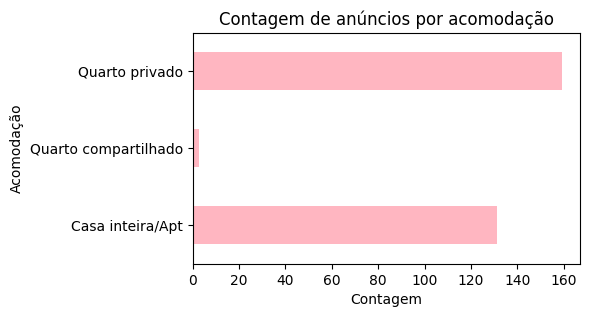

In [ ]:
#Contagem de anúncios por acomodação
#Quarto privado possui a maior quantide de ofertas de anúncio
dfti.groupby(['tipo_acomodacao']).size().plot.barh(figsize=(5,3), color=['lightpink'])
plt.xlabel('Contagem')
plt.ylabel('Acomodação')
plt.title('Contagem de anúncios por acomodação')
plt.show()

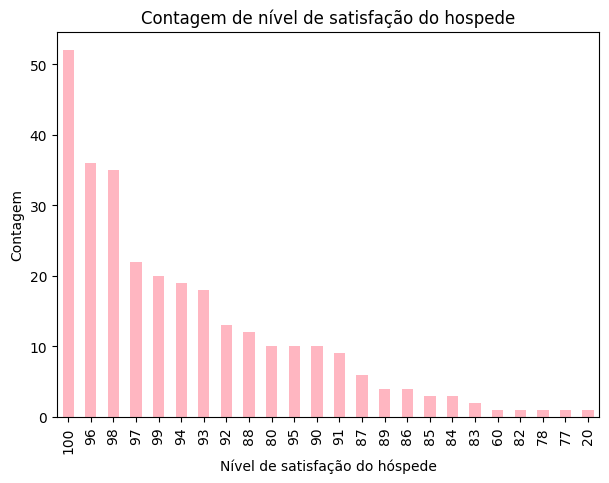

In [ ]:
dfti.groupby('satisfacao_hospede').size().sort_values(ascending=False).plot.bar(figsize=(7,5), color=['lightpink'])
plt.xlabel('Nível de satisfação do hóspede')
plt.ylabel('Contagem')
plt.title('Contagem de nível de satisfação do hospede')
plt.show()

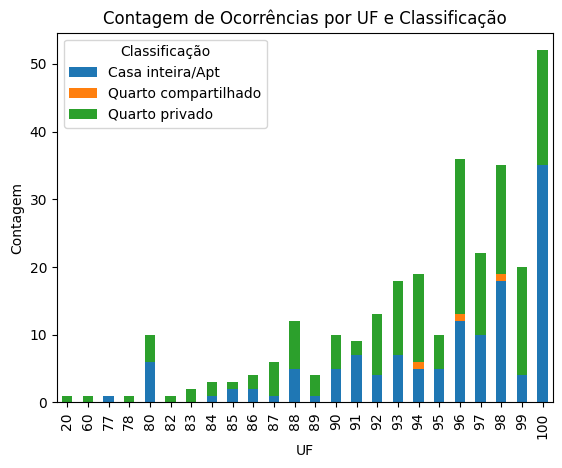

In [ ]:
# Gráfico de barras empilhadas da contagem de ocorrências por 'uf' e 'classificacao':
dfti.groupby(['satisfacao_hospede', 'tipo_acomodacao']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('UF')
plt.ylabel('Contagem')
plt.title('Contagem de Ocorrências por UF e Classificação')
plt.legend(title='Classificação')
plt.show()

##**Considerações**

A partir desta análise tiramos as seguintes considerações:

* A média de preço total das hospedagens é de EUR 520,77
* A média de satisfação de hospéde é de 94,17
* A média de capacidade de hospedagem é de 3 hospede
* A média de avaliação de limpeza é de 9.4
* A média de quartos é de 1

Foi possível identificar que o maior número de anúncios são de quartos privados e Casa/Apt a limpeza é um fator importante para hospedagens com preço menor ou igual a média do preço.

Como oportunidade é interessante investir em quartos privados e Casa/apt pois estes são os anúncios mais procurados e como ameça a falta de limpeza pode influenciar na atração do anúncio.